In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [7]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [18]:
ytest_pred

array([[0.44081427, 0.55918573],
       [0.53671782, 0.46328218],
       [0.46179786, 0.53820214],
       ...,
       [0.46759663, 0.53240337],
       [0.5582802 , 0.4417198 ],
       [0.44011043, 0.55988957]])

In [19]:
final_prediction=pd.DataFrame(ytest_pred[:,1])
final_prediction

0
0    0.559186
1    0.463282
2    0.538202
3    0.509875
4    0.490344
..        ...
595  0.461121
596  0.441377
597  0.532403
598  0.441720
599  0.559890

[600 rows x 1 columns]

In [20]:
roc_auc_score(y_test,final_prediction)

0.9826111111111111

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

In [22]:
thresholds

array([1.66643608, 0.66643608, 0.64700697, 0.64696937, 0.53368928,
       0.53347832, 0.53043576, 0.5303084 , 0.5302098 , 0.53010857,
       0.52629801, 0.52592546, 0.51812637, 0.51811793, 0.51454398,
       0.51437056, 0.51264523, 0.5122122 , 0.51050729, 0.51040027,
       0.50987497, 0.50819211, 0.50456059, 0.50276001, 0.50240207,
       0.50236638, 0.5018404 , 0.49940956, 0.49917891, 0.49847317,
       0.49659656, 0.494437  , 0.49404622, 0.49325918, 0.49287506,
       0.49267421, 0.49203243, 0.49180231, 0.49034409, 0.48814868,
       0.48791596, 0.48693014, 0.48662546, 0.48548057, 0.48441547,
       0.48341133, 0.48269825, 0.47816348, 0.47803203, 0.47777127,
       0.4777704 , 0.47195328, 0.47182968, 0.47153157, 0.47133542,
       0.46999086, 0.4695729 , 0.46523687, 0.46518889, 0.4584972 ,
       0.45835248, 0.41995773])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

thresholds  accuracy
22    0.504561  0.943333
23    0.502760  0.941667
25    0.502366  0.940000
24    0.502402  0.940000
38    0.490344  0.938333

In [24]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

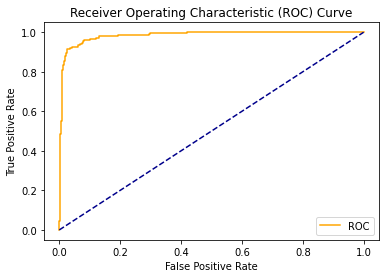

In [26]:
plot_roc_curve(fpr,tpr)